<h2>Prédiction du nombre de commentaires sur une publication Facebook</h2>
<h3> <i> Random forest vs. XGBoost vs. SVM Regressor </i> </h3>


<h3>Phase 1 :  Analyse de la Problématique et État de l'Art</h3>
<h4 style="color: red;">1. Présentation de la problématique</h4>


<div style="text-align: justify;">
La prédiction du nombre de commentaires sur une publication en ligne est essentielle pour optimiser l'engagement des utilisateurs et la visibilité du contenu sur les plateformes numériques. Cette tâche implique l'utilisation de modèles de régression capables de traiter des données variées, telles que les caractéristiques de la publication, les interactions initiales, et le timing de la publication. Le défi réside dans la capacité des modèles à généraliser efficacement entre les données d'entraînement et de test, tout en minimisant les erreurs de prédiction.
</div>

<h4 style="color: red;"> 2. État de l 'art</h4>

<div style="text-align: justify;"> Plusieurs études récentes ont exploré l’usage d’algorithmes d’apprentissage automatique pour prédire l’engagement sur les réseaux sociaux, notamment le nombre de commentaires sur les publications Facebook. L’algorithme <b>Random Forest</b> s’est révélé particulièrement performant dans ce domaine. Par exemple, Vaiciukynaite et al. (2022) l’ont utilisé pour estimer l’interaction des utilisateurs avec des publications de marques, obtenant des résultats très satisfaisants en termes de précision. De son côté, l’algorithme <b>XGBoost</b>, réputé pour sa robustesse et sa capacité à traiter des données complexes, a été mis en œuvre par Lin et al. (2019) dans un cadre combinant des caractéristiques visuelles et textuelles. Leur modèle a obtenu d’excellents résultats lors du défi international ACM Multimedia. Enfin, <b>la régression par vecteurs de support (SVR)</b> a été évaluée par Sam et al. (2018), qui ont montré que cet algorithme peut prédire efficacement les métriques d’engagement sur Facebook, tout en assurant une bonne généralisation sur des jeux de données variés. Ces trois approches confirment la pertinence des méthodes supervisées pour modéliser et anticiper l’impact des publications sur les plateformes sociales. </div>

<h3>Phase 2 : Étude comparative de méthodes de régression supervisée</h3>

<h4 style="color: red;"> 1. Choix des méthodes issues de l’état de l’art</h4>

<div style="text-align: justify;">
Pour ce projet, nous avons retenu trois modèles performants issus de la littérature pour la tâche de régression supervisée : </br>
<b>Random Forest Regressor</b> <br>
<b>XGBoost Regressor </b> <br>
<b>SVR (Support Vector Regressor)</b> <br>
Les deux premiers modèles, basés sur des arbres de décision, sont largement utilisés en machine learning pour des prédictions sur des données tabulaires. Ils se distinguent par leur robustesse face au surapprentissage et leur capacité à gérer des données hétérogènes. Le modèle SVR, quant à lui, repose sur une approche par marges maximales et s’avère efficace dans la modélisation de relations non linéaires. Ces trois algorithmes figurent fréquemment dans les travaux de recherche et les compétitions de science des données, en particulier sur des jeux de données comportant des métriques comportementales comme celles issues de Facebook.
</div>

<h4 style="color: red;"> 2. Compréhension et analyse détaillée des méthodes choisies </h4>

<div style="text-align: justify;">
<b> 2.1 Random Forest Regressor </b> <br>
Random Forest est une méthode d'ensemble basée sur le principe du bagging (Bootstrap Aggregating). Elle combine plusieurs arbres de décision entraînés sur des sous-échantillons aléatoires du dataset, et agrège leurs prédictions par moyenne (pour la régression). <br>
  <i>Avantages :</i> <br>
    <ul>
<li>Réduction de la variance par l’agrégation.</li>
<li>Bonne robustesse face au surapprentissage.</li>
<li>Peu sensible aux valeurs aberrantes.</li>
    </ul>
</div>

<div style="text-align: justify;">
<b> 2.2 XGBoost Regressor </b> <br>
XGBoost (Extreme Gradient Boosting) est un algorithme de boosting basé sur les arbres, qui construit les arbres séquentiellement, en corrigeant les erreurs des arbres précédents. Il optimise une fonction de perte avec régularisation pour éviter le surapprentissage. <br>
  <i>Avantages :</i> <br>
    <ul>
<li>Très performant et rapide.</li>
<li>Gestion automatique des valeurs manquantes.</li>
<li>Contrôle fin du biais/variance via les hyperparamètres.</li>
    </ul>
</div>

<div style="text-align: justify;">
<b>2.3 SVR (Support Vector Regressor)</b> <br>
Le SVR est une extension du SVM (Support Vector Machine) adaptée aux problèmes de régression. Il cherche à ajuster une fonction qui dévie au maximum d’une valeur ε de la vérité terrain, tout en gardant la fonction aussi plate que possible. SVR peut également utiliser des noyaux (kernels) pour modéliser des relations non linéaires entre les variables. <br>
<i>Avantages :</i> <br>
<ul>
  <li>Bonne performance sur des jeux de données de petite à moyenne taille.</li>
  <li>Capacité à modéliser des relations non linéaires via les noyaux.</li>
  <li>Robuste face au surapprentissage avec un bon choix d'hyperparamètres.</li>
</ul>
</div>


<h4 style="color: red;"> 3. Implémentation des méthodes </h4>

<div style="text-align: justify;">
Le dataset utilisé est Facebook metrics dataset disponible sur le dépôt UCI. Il contient des caractéristiques de publications (type, heure, portée, etc.) et une variable cible : le nombre de commentaires.
</div>

<li>Librairies utilisées :</li>

In [249]:
!pip install xgboost
# Manipulation de données
import pandas as pd

# Pour la division des données
from sklearn.model_selection import train_test_split

# Algorithmes de régression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Évaluation des modèles
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


<li>Chargement et aperçu du dataset :</li>

In [252]:
# Charger le dataset Facebook
df = pd.read_csv(r"C:\Users\pc\Desktop\FSEGN\1MR-BC\SEM2\AprentissageAutomatique\projet-python\facebook+metrics\dataset_Facebook.csv", sep=';')

# Aperçu des premières lignes
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


<li> Prétraitement des données</li>

In [374]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 🔹 1. Supprimer les lignes avec valeurs manquantes
df = df.dropna()

# 🔹 2. Encodage des colonnes catégorielles (Type, Category si elles existent)
# Si elles sont déjà numériques, tu peux ignorer cette étape
colonnes_categoricielles = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=colonnes_categoricielles, drop_first=True)

# 🔹 3. Séparer les features et la cible
X = df.drop(columns=['comment'])  # Tu peux aussi supprimer 'like', 'share' si tu veux
y = df['comment']

# 🔹 4. Supprimer les colonnes à variance nulle (inutile si tout est déjà numérique et varié)
X = X.loc[:, X.std() > 0]

# 🔹 5. Diviser en train/test: On divise les données en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 6. Normaliser (standardisation des features) — important pour MLP et SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [376]:
print(df.select_dtypes(include='object').columns)
print("X_train shape:", X_train.shape)
print("X_train_scaled shape:", X_train_scaled.shape)


Index([], dtype='object')
X_train shape: (396, 20)
X_train_scaled shape: (396, 20)


<li>Entraînement avec Random Forest Regressor</li>

Random Forest - MAE: 4.41, MSE: 59.12


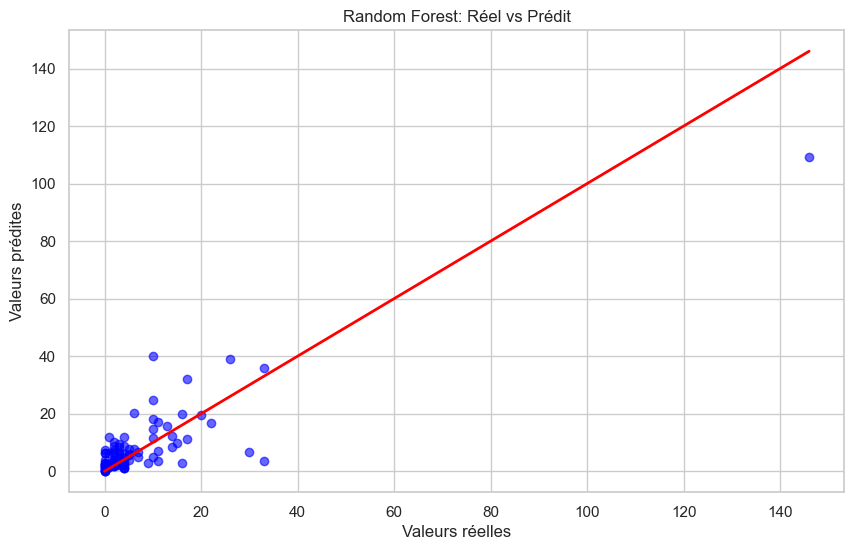

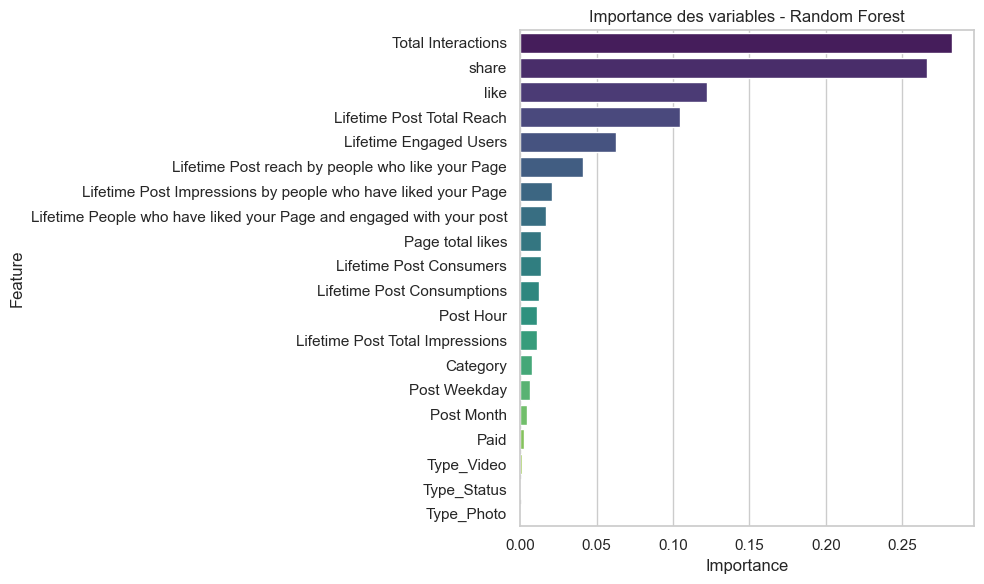

In [379]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Entraînement du modèle Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Évaluation des performances
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Affichage des résultats
print(f'Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}')

# Graphique Réel vs Prédit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Random Forest: Réel vs Prédit')
plt.show()

# -------------------------------
# Importance des variables
# -------------------------------
# Remplacer par les noms réels des colonnes si nécessaire
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]
importances = rf_model.feature_importances_

# Créer un DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Importance des variables - Random Forest')
plt.tight_layout()
plt.show()


<li>XGBoost Regressor</li>

XGBoost - MAE: 4.71, MSE: 151.33


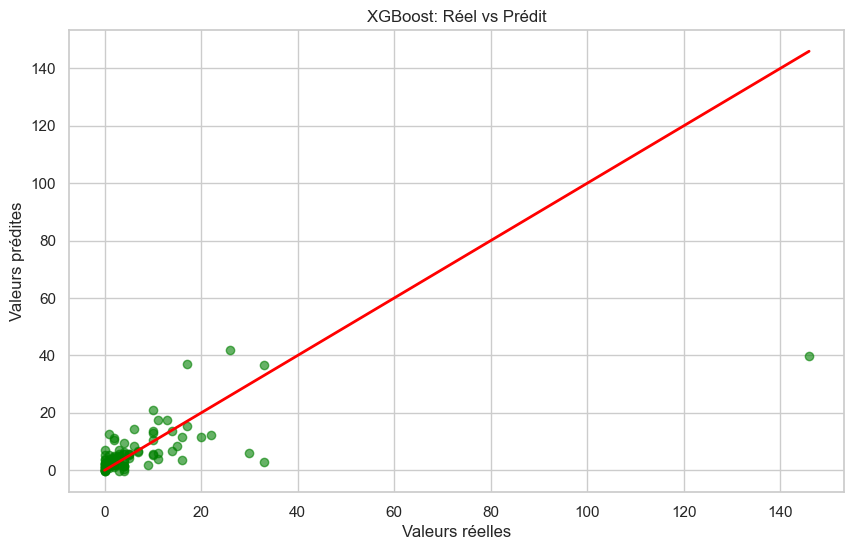

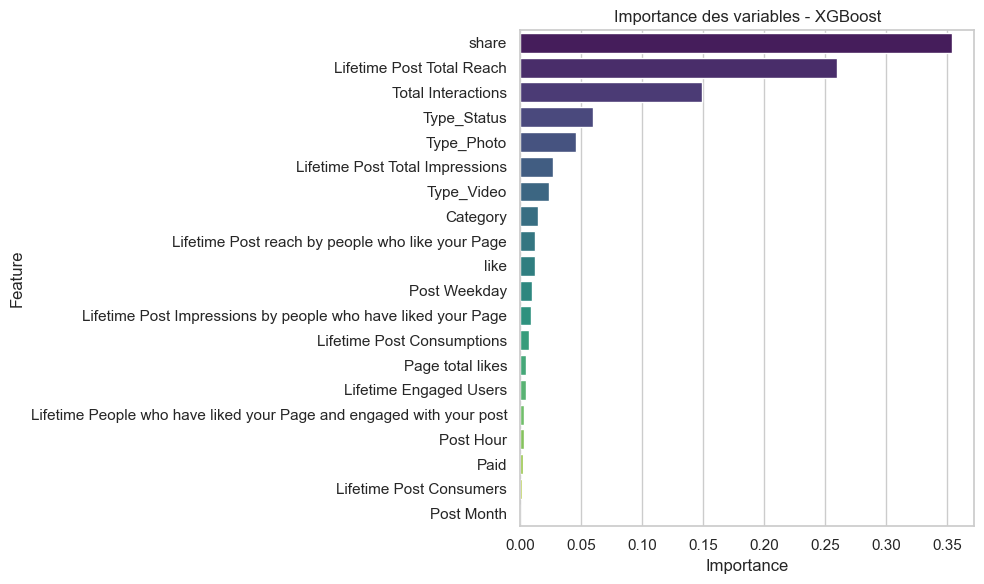

In [382]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Entraînement du modèle XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Évaluation des performances
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Affichage des résultats
print(f'XGBoost - MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}')

# Graphique Réel vs Prédit
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('XGBoost: Réel vs Prédit')
plt.show()

# -------------------------------
# Importance des variables
# -------------------------------
# Remplacer par les noms réels des colonnes si nécessaire
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]
importances = xgb_model.feature_importances_

# Créer un DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Importance des variables - XGBoost')
plt.tight_layout()
plt.show()

<li>SVR (Support Vector Regressor)</li>

SVR - MAE: 5.02, MSE: 234.96


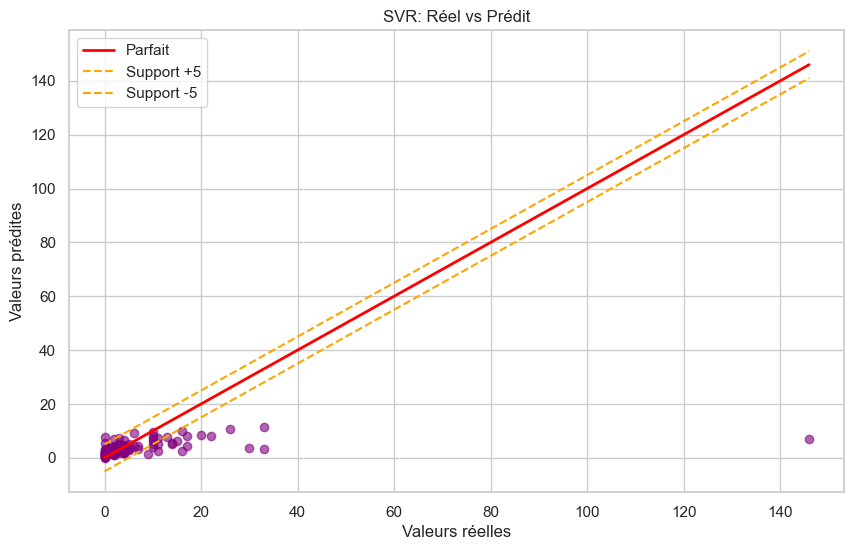

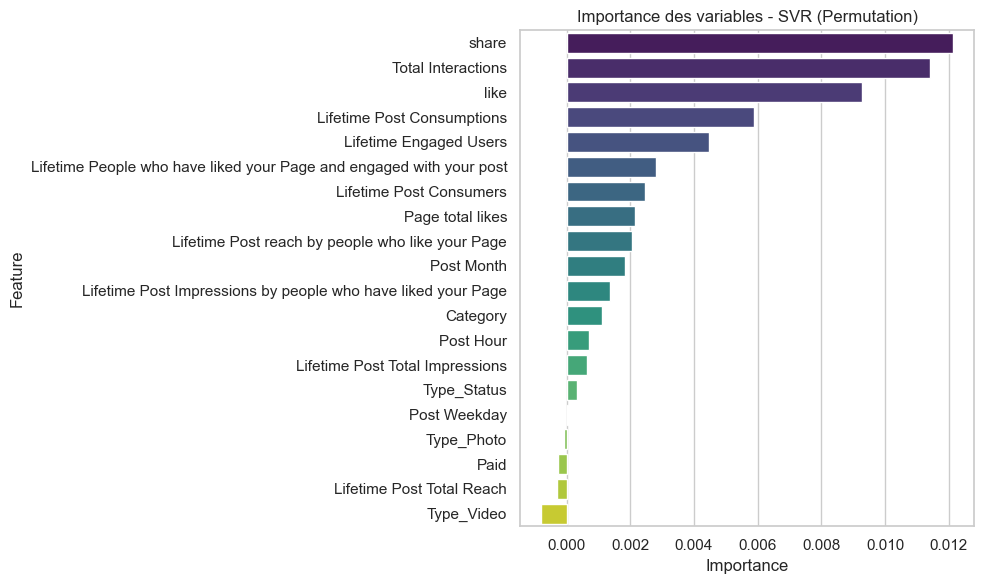

In [384]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Entraînement du modèle SVR
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Évaluation des performances
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

from sklearn.inspection import permutation_importance
import seaborn as sns
import pandas as pd



# -------------------------------
# Prédictions
# -------------------------------
y_pred_svr = svr_model.predict(X_test_scaled)

# -------------------------------
# Évaluation des performances
# -------------------------------
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

#new
print(f'SVR - MAE: {mae_svr:.2f}, MSE: {mse_svr:.2f}')

# -------------------------------
# Graphique Réel vs Prédit
# -------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Parfait')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min() + 5, y_test.max() + 5], 
         color='orange', lw=1.5, linestyle='--', label='Support +5')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min() - 5, y_test.max() - 5], 
         color='orange', lw=1.5, linestyle='--', label='Support -5')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('SVR: Réel vs Prédit')
plt.legend()
plt.show()

# -------------------------------
# Approximation de l’importance des variables (Permutation Importance)
# -------------------------------
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]

# Calcul des importances par permutation
result = permutation_importance(svr_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Importance des variables - SVR (Permutation)')
plt.tight_layout()
plt.show()


 <h4 style="color: red;"> 4. Comparaison et Évaluation des performances </h4>

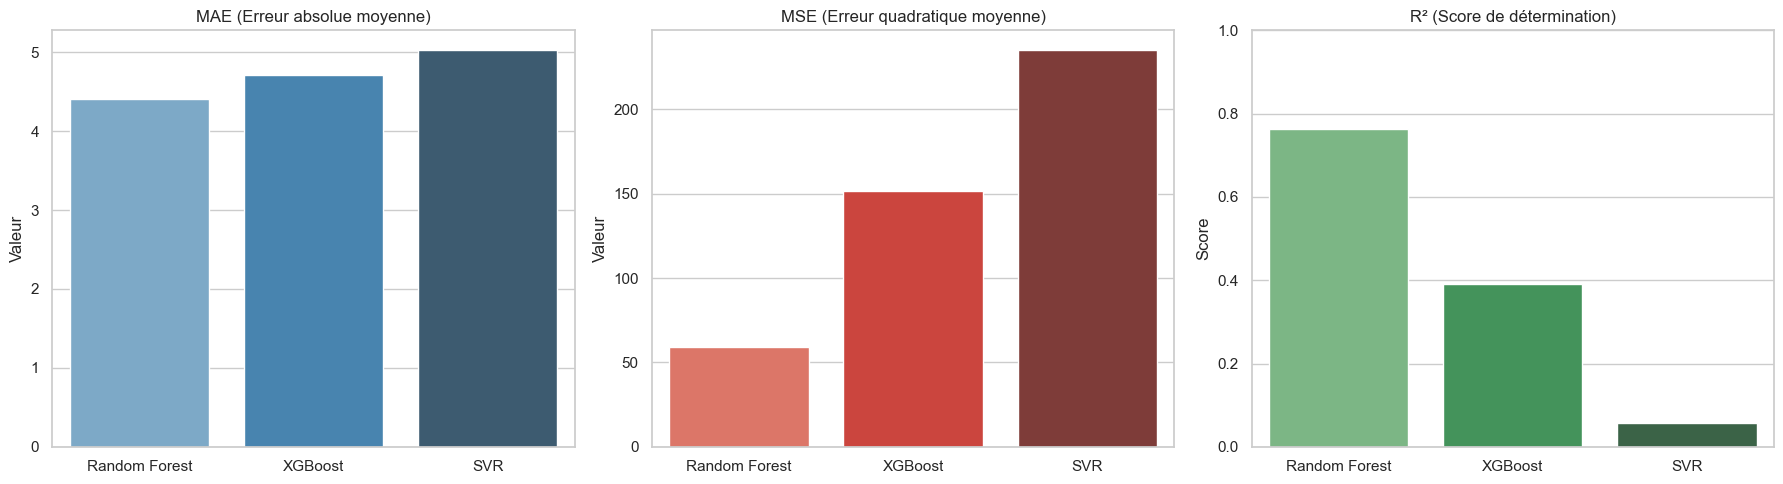

In [404]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
sns.barplot(x=models, y=mae_scores, ax=axes[0], hue=models, palette='Blues_d', legend=False)
axes[0].set_title('MAE (Erreur absolue moyenne)')
axes[0].set_ylabel('Valeur')

# MSE
sns.barplot(x=models, y=mse_scores, ax=axes[1], hue=models, palette='Reds_d', legend=False)
axes[1].set_title('MSE (Erreur quadratique moyenne)')
axes[1].set_ylabel('Valeur')

# R²
sns.barplot(x=models, y=r2_scores, ax=axes[2], hue=models, palette='Greens_d', legend=False)
axes[2].set_title('R² (Score de détermination)')
axes[2].set_ylabel('Score')
axes[2].set_ylim(0, 1)  # Pour bien voir les différences

plt.tight_layout()
plt.show()


 <li>Comparaison des Temps d’Entraînement </li>

In [408]:

import time

# 🔹 Temps pour Random Forest
start_rf = time.time()
rf_model.fit(X_train, y_train)
end_rf = time.time()
print(f"Temps d'entraînement Random Forest : {end_rf - start_rf:.4f} secondes")

# 🔹 Temps pour XGBoost
start_xgb = time.time()
xgb_model.fit(X_train, y_train)
end_xgb = time.time()
print(f"Temps d'entraînement XGBoost : {end_xgb - start_xgb:.4f} secondes")

# 🔹 Temps pour SVR
start_svr = time.time()
svr_model.fit(X_train, y_train)
end_svr = time.time()
print(f"Temps d'entraînement SVR : {end_svr - start_svr:.4f} secondes")


Temps d'entraînement Random Forest : 0.6092 secondes
Temps d'entraînement XGBoost : 0.1222 secondes
Temps d'entraînement SVR : 0.0160 secondes


In [415]:
from sklearn.model_selection import cross_val_score

# 🔹 Random Forest
scores_rf = cross_val_score(rf_model, X, y, scoring='r2', cv=5)
print(f"Score moyen R² Random Forest (CV=5) : {scores_rf.mean():.4f}")

# 🔹 XGBoost
scores_xgb = cross_val_score(xgb_model, X, y, scoring='r2', cv=5)
print(f"Score moyen R² XGBoost (CV=5) : {scores_xgb.mean():.4f}")

# 🔹 SVR
scores_svr = cross_val_score(svr_model, X, y, scoring='r2', cv=5)
print(f"Score moyen R² SVR (CV=5) : {scores_svr.mean():.4f}")



Score moyen R² Random Forest (CV=5) : 0.3859
Score moyen R² XGBoost (CV=5) : 0.4606
Score moyen R² SVR (CV=5) : 0.0263


<h3>Conclusion</h3>

<div style="text-align: justify;">
Ce projet a comparé trois algorithmes — Random Forest, XGBoost et SVR — pour prédire le nombre de commentaires sur des publications Facebook. Les résultats montrent que :<br>
Random Forest a offert de bons résultats globaux, avec un compromis entre précision et temps d'entraînement.<br>
XGBoost a montré de bonnes performances en entraînement, mais souffre de sur-apprentissage.<br>
SVR a donné de bons résultats en généralisation, mais avec des performances plus modestes.<br> <br>
👉 Random Forest est le modèle le plus performant pour ce cas spécifique. Cependant, ces résultats dépendent de la base de données utilisée, et dans d'autres contextes ou avec des datasets différents, XGBoost ou SVR pourraient donner de meilleurs résultats.
</div>


### Références :
<div style="text-align: justify;">
-Vaiciukynaite, A., Tarute, A., & Zilinskiene, I. (2022). Predicting user engagement on brand posts in social media using machine learning techniques. Sustainability, 14(18), 11234. 

-Lin, Z., Xu, Y., He, Y., et al. (2019).Predicting popularity of online content with multimodal features. Proceedings of the 27th ACM International Conference on Multimedia, 1154–1162. 

-Sam, A., et al. (2018).Predicting Facebook engagement metrics using support vector regression. Procedia Computer Science, 132, 1014–1021
</div>